In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

fichiers = {
    "C:/Users/USER/Documents/projet&code/datasets/football/ligue1/season-1920.csv": "2019/2020",
    "C:/Users/USER/Documents/projet&code/datasets/football/ligue1/season-2021.csv": "2020/2021",
    "C:/Users/USER/Documents/projet&code/datasets/football/ligue1/season-2122.csv": "2021/2022",
    "C:/Users/USER/Documents/projet&code/datasets/football/ligue1/season-2223.csv": "2022/2023",
    "C:/Users/USER/Documents/projet&code/datasets/football/ligue1/season-2324.csv": "2023/2024",
    "C:/Users/USER/Documents/projet&code/datasets/football/ligue1/season-2425.csv": "2024/2025",

}

# Liste pour stocker les DataFrames
dfs = []

# Charger les fichiers un par un
for fichier, saison in fichiers.items():
    df = pd.read_csv(fichier)
    df["Saison"] = saison  # Ajouter la saison dans une nouvelle colonne
    dfs.append(df)

# Fusionner tous les DataFrames en un seul
ligue1_all = pd.concat(dfs, ignore_index=True)
print(ligue1_all.shape)








(2031, 23)


In [2]:
# netoyage des donnes
ligue1_all["HST"] = ligue1_all["HST"].fillna(0)
ligue1_all["AST"] = ligue1_all["AST"].fillna(0)
ligue1_all["HF"] = ligue1_all["HF"].fillna(0)
ligue1_all["AF"] = ligue1_all["AF"].fillna(0)

# Supprimer les lignes sans issue de match (FTR)
ligue1_all = ligue1_all.dropna(subset=["FTR"])
print(ligue1_all.head(3))
print(ligue1_all.shape)
print(ligue1_all.columns)

##
ligue1_all['Date'] = pd.to_datetime(ligue1_all['Date'])

ligue1_all['Month'] = ligue1_all['Date'].dt.month
ligue1_all['Day'] = ligue1_all['Date'].dt.day
ligue1_all['Year'] = ligue1_all['Date'].dt.year
# First, ensure 'Year', 'Month', and 'Day' are integers
ligue1_all[['Year', 'Month', 'Day']] = ligue1_all[['Year', 'Month', 'Day']].astype(int)
ligue1_all['Date'] = ligue1_all['Year'] * 10000 + ligue1_all['Month'] * 100 + ligue1_all['Day']
# Drop the the table less used :
ligue1_all.drop('Day', axis=1,inplace=True)
ligue1_all.drop('Month', axis=1, inplace=True)
ligue1_all.drop('Year', axis=1, inplace= True)
ligue1_all.drop('Referee', axis=1, inplace=True)
# ligue1_all.drop('Date', axis=1, inplace=True)
print(ligue1_all.head(3))
print(ligue1_all.shape)
print(ligue1_all.columns)

       Date   HomeTeam  AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  Referee  \
0  09/08/19     Monaco      Lyon     0     3   A     0     2   A      NaN   
1  10/08/19  Marseille     Reims     0     2   A     0     0   D      NaN   
2  10/08/19     Angers  Bordeaux     3     1   H     3     1   H      NaN   

   ...  AST  HF  AF  HC  AC  HY  AY  HR  AR     Saison  
0  ...    3  10  17   2   5   2   2   1   0  2019/2020  
1  ...    5  18   8   5   3   1   0   0   0  2019/2020  
2  ...    3  11  15   4   3   2   1   0   0  2019/2020  

[3 rows x 23 columns]
(2031, 23)
Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'Saison'],
      dtype='object')
       Date   HomeTeam  AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  ...  \
0  20190908     Monaco      Lyon     0     3   A     0     2   A   7  ...   
1  20191008  Marseille     Reims     0     2   A     0    

C:\Users\USER\AppData\Local\Temp\ipykernel_13160\309473193.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ligue1_all['Date'] = pd.to_datetime(ligue1_all['Date'])


encodage 

In [3]:
ligue1_all = pd.get_dummies(ligue1_all, columns=["HomeTeam", "AwayTeam"], drop_first=True)

# Définir X et y
y = ligue1_all["FTR"].map({"H": 0, "D": 1, "A": 2})  # cible
X = ligue1_all.drop(columns=["FTR", "HTR", "Saison"], errors="ignore")  # variables d'entrée

pca


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_components = 23
pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train)


apprentisage

In [5]:


model_pca = RandomForestClassifier(n_estimators=100, random_state=42)

   # Fit the model on the reduced training data
model_pca.fit(X_train_reduced, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# #evaluer le modele
X_test_reduced = pca.transform(X_test)
y_pred_pca = model_pca.predict(X_test_reduced)

print("Accuracywith pca :", accuracy_score(y_test, y_pred_pca))
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_pca))
print("Rapport de classification :")
print(classification_report(y_test, y_pred_pca))


Accuracywith pca : 0.773955773955774
Matrice de confusion :
[[164  17   2]
 [ 36  36  27]
 [  2   8 115]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       183
           1       0.59      0.36      0.45        99
           2       0.80      0.92      0.86       125

    accuracy                           0.77       407
   macro avg       0.73      0.73      0.72       407
weighted avg       0.75      0.77      0.76       407



In [7]:
importances = model_pca.feature_importances_
feature_names = ['PC' + str(i+1) for i in range(n_components)]
sorted_indices = importances.argsort()
sorted_feature_importance = [(feature_names[i], importances[i]) for i in range(len(feature_names))]
sorted_feature_importance.sort(key=lambda x: x[1], reverse=True)
for feature, score in sorted_feature_importance:
       print(f"{feature}: {score}")


PC6: 0.1310192268161374
PC13: 0.09627810490663985
PC8: 0.0720969876405822
PC9: 0.06521372643359205
PC14: 0.0637941349424493
PC15: 0.05971865177877164
PC12: 0.052706510547939546
PC2: 0.048787679825666966
PC7: 0.04385547753479149
PC17: 0.04228649591394773
PC11: 0.0322291778919613
PC5: 0.027176332272097807
PC16: 0.026156754509380924
PC18: 0.025621664237241888
PC23: 0.025278812477205613
PC19: 0.02510332059286241
PC21: 0.024313163347845553
PC4: 0.0240950908143177
PC3: 0.02313979584404732
PC22: 0.02296426694672111
PC1: 0.02280107520944539
PC20: 0.022771304644845114
PC10: 0.02259224487150944


plot importance

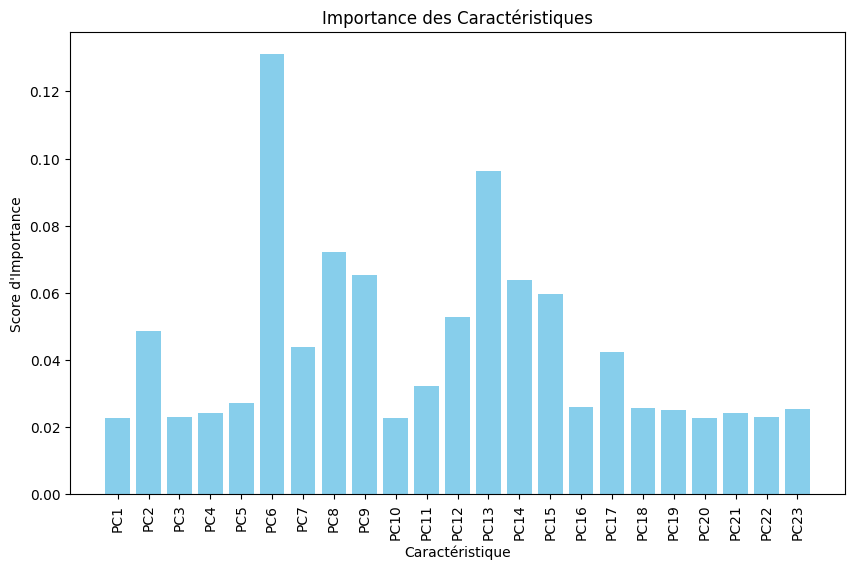

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Importance des Caractéristiques")
plt.bar(range(len(feature_names)), importances, align="center", color="#87CEEB", label="Importance")
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.xlabel("Caractéristique")
plt.ylabel("Score d'Importance")
plt.show()

In [9]:
loadings = pca.components_.shape
# Obtenir les noms d'origine des colonnes
original_features = X.columns

# Créer un DataFrame pour visualiser les poids de chaque feature sur chaque composante
pca_df = pd.DataFrame(pca.components_, columns=original_features, index=feature_names)
print("Top features dans la composante PC6 :")
print(pca_df.loc["PC6"].sort_values(key=abs, ascending=False).head(5))
print("Top features dans la composante PC13 :")
print(pca_df.loc["PC13"].sort_values(key=abs, ascending=False).head(5))
print("Top features dans la composante PC10 :")
print(pca_df.loc["PC10"].sort_values(key=abs, ascending=False).head(5))
print("Top features dans la composante PC1(la plus basse) :")
print(pca_df.loc["PC2"].sort_values(key=abs, ascending=False).head(5))

Top features dans la composante PC6 :
HC      0.791972
HST    -0.408455
FTHG   -0.252303
AC     -0.244322
AST     0.162169
Name: PC6, dtype: float64
Top features dans la composante PC13 :
FTAG    0.680639
HTAG    0.474625
AST    -0.457310
HY     -0.217363
FTHG   -0.157758
Name: PC13, dtype: float64
Top features dans la composante PC10 :
AY      0.825136
HY      0.528420
AF     -0.125609
FTAG    0.071814
HF     -0.066420
Name: PC10, dtype: float64
Top features dans la composante PC1(la plus basse) :
HS     0.704374
AS    -0.525872
HC     0.264059
HST    0.246137
AC    -0.223111
Name: PC2, dtype: float64
